<a href="https://colab.research.google.com/github/lauren-safwat/Unsupervised-ML-Algorithms/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

# **Reading the preprocessed dataset**

In [2]:
data_path = 'Dataset/preprocessed_data.csv'
data = pd.read_csv(data_path, index_col=0)

# **PCA**

In [3]:
pca = PCA()
pca_df = pd.DataFrame(pca.fit_transform(data), index=data.index, columns=data.columns)

Text(0, 0.5, 'Cumulative explained variance')

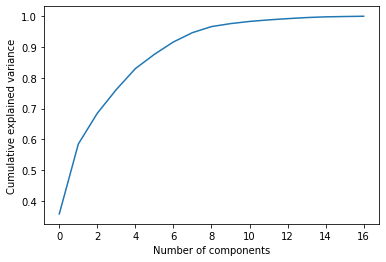

In [4]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

We can see that the best number of components is 7

In [5]:
pca = PCA(n_components=7)
pca_df = pd.DataFrame(pca.fit_transform(data), index=data.index)

### **K-means Clustering with PCA**

In [6]:
kmeans = KMeans(n_clusters=4, max_iter = 100)
kmeans.fit_transform(pca_df)

array([[2.06494688, 5.83837769, 4.53492393, 4.97468587],
       [6.01524543, 5.03017472, 2.57803196, 6.66828784],
       [4.41706785, 4.09636499, 5.57778656, 2.39822335],
       ...,
       [3.22964419, 6.63216575, 6.4710551 , 5.64559289],
       [5.38614266, 7.39638372, 4.94055869, 7.84483612],
       [5.42681689, 5.17540067, 5.76134467, 5.83110875]])

In [7]:
tsne = TSNE(n_components=2, n_jobs=-1, perplexity=30, random_state=1, n_iter=300, verbose=0)
pca_tsne = tsne.fit_transform(pca_df)

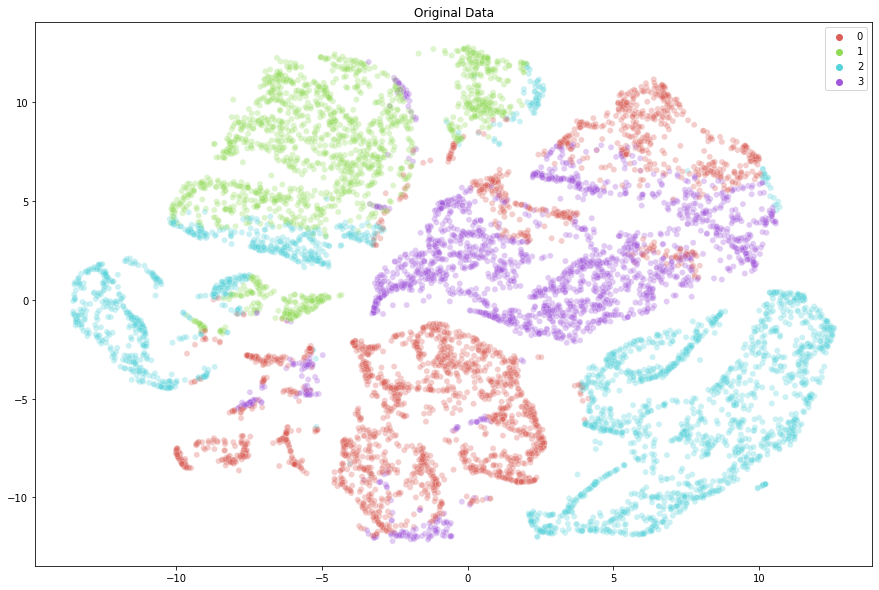

In [8]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=pca_tsne[:,0],
    y=pca_tsne[:,1],
    hue=kmeans.labels_,
    palette=sns.color_palette("hls", 4),
    legend="full",
    data=pca_tsne,
    alpha=0.3
).set(title='Original Data');

In [9]:
score = silhouette_score(pca_df, kmeans.labels_, metric='euclidean')
score

0.2575808840801196

# **Kernel PCA**

In [10]:
kpca = KernelPCA(n_components=7, kernel='rbf')
kpca_df = pd.DataFrame(kpca.fit_transform(data), index=data.index)

### **K-means Clustering with Kernel PCA**

In [11]:
kmeans = KMeans(n_clusters=4, max_iter = 100)
kmeans.fit_transform(kpca_df)

array([[0.37870848, 0.88400634, 0.87471381, 0.84581546],
       [0.86072442, 0.77352543, 0.9627604 , 0.36628634],
       [0.70629225, 0.68935815, 0.42489792, 0.93138713],
       ...,
       [0.32932046, 0.77020947, 0.79634921, 0.86736446],
       [0.62469658, 0.74166226, 0.83871814, 0.65121311],
       [0.52508246, 0.46382695, 0.64889733, 0.68567643]])

In [12]:
tsne = TSNE(n_components=2, n_jobs=-1, perplexity=30, random_state=1, n_iter=300, verbose=0)
kpca_tsne = tsne.fit_transform(kpca_df)

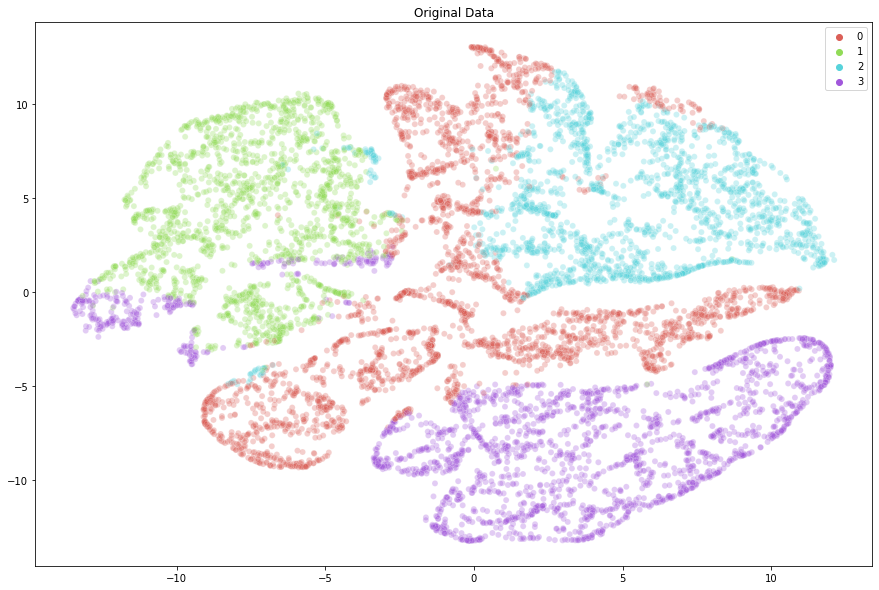

In [13]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x=kpca_tsne[:,0],
    y=kpca_tsne[:,1],
    hue=kmeans.labels_,
    palette=sns.color_palette("hls", 4),
    legend="full",
    data=kpca_tsne,
    alpha=0.3
).set(title='Original Data');

In [14]:
score = silhouette_score(kpca_df, kmeans.labels_, metric='euclidean')
score

0.2953495203770882

- Based on the silhouette score after applying Kmeans on both cases, we can see that Kernel PCA is better as it resulted in a higher silhouette score than PCA.